<a href="https://colab.research.google.com/github/jcdumlao14/Homework-ml-zoomcamp/blob/main/03_Homework_housingPriceClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning Zoomcamp 2022**

## Classification - California Housing Prices

# **Homework 03** 



> Note: sometimes your answer doesn't match one of the options exactly. That's fine. Select the option that's closest to your solution.





# **Dataset**

In this homework, we will use the California Housing Prices data from Kaggle.

Here's a wget-able link:



# **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import mutual_info_score, mean_squared_error
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression, Ridge

plt.rcParams['figure.figsize'] = (16,8)
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings("ignore")

# **Loading and Reading Data**

In [2]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

--2022-10-01 00:43:25--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]   1.36M  --.-KB/s    in 0.05s   

2022-10-01 00:43:25 (24.8 MB/s) - ‘housing.csv’ saved [1423529/1423529]



In [3]:
data = pd.read_csv('housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


We'll keep working with the 'median_house_value' variable, and we'll transform it to a classification task.

Features

For the rest of the homework, you'll need to use only these columns:

* 'latitude',
* 'longitude',
* 'housing_median_age',
* 'total_rooms',
* 'total_bedrooms',
* 'population',
* 'households',
* 'median_income',
* 'median_house_value',
* 'ocean_proximity',

# Data preparation

* Select only the features from above and fill in the missing values with 0.
* Create a new column rooms_per_household by dividing the column total_rooms by the column households from dataframe.
* Create a new column bedrooms_per_room by dividing the column total_bedrooms by the column total_rooms from dataframe.
* Create a new column population_per_household by dividing the column population by the column households from dataframe.


In [4]:
features = ['latitude','longitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value','ocean_proximity']

df = data[features]

df.describe()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,35.631861,-119.569704,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.135952,2.003532,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,32.540000,-124.350000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,33.930000,-121.800000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,34.260000,-118.490000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,37.710000,-118.010000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,41.950000,-114.310000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Select only the features from above and fill in the missing values with 

In [5]:
from IPython.display import display 
missing_vals = df.isnull().sum()
print("Before Inputing Missing Values")
display(missing_vals.to_frame().reset_index().rename({'index':'Variables',0:'Missing Values'}, axis = 1).sort_values
        (by = 'Missing Values', ascending = False).style.background_gradient('Reds'))

df.fillna(0, inplace = True)
print("After Inputing Missing Values")
display(df.isnull().sum().to_frame().reset_index().rename({'index':'Varaibles',0:'Missing Values'},axis =1).style.background_gradient('Reds'))


Before Inputing Missing Values


,Variables,Missing Values
4,total_bedrooms,207
0,latitude,0
1,longitude,0
2,housing_median_age,0
3,total_rooms,0
5,population,0
6,households,0
7,median_income,0
8,median_house_value,0
9,ocean_proximity,0


After Inputing Missing Values


,Varaibles,Missing Values
0,latitude,0
1,longitude,0
2,housing_median_age,0
3,total_rooms,0
4,total_bedrooms,0
5,population,0
6,households,0
7,median_income,0
8,median_house_value,0
9,ocean_proximity,0


In [6]:
df["rooms_per_household"] = df["total_rooms"] /df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"]/df["total_rooms"]
df["population_per_household"] = df["population"] /df["households"]

In [7]:
df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467


# **Question 1**

What is the most frequent observation (mode) for the column ocean_proximity?

Options:

* NEAR BAY
* <1H OCEAN
* INLAND
* NEAR OCEAN


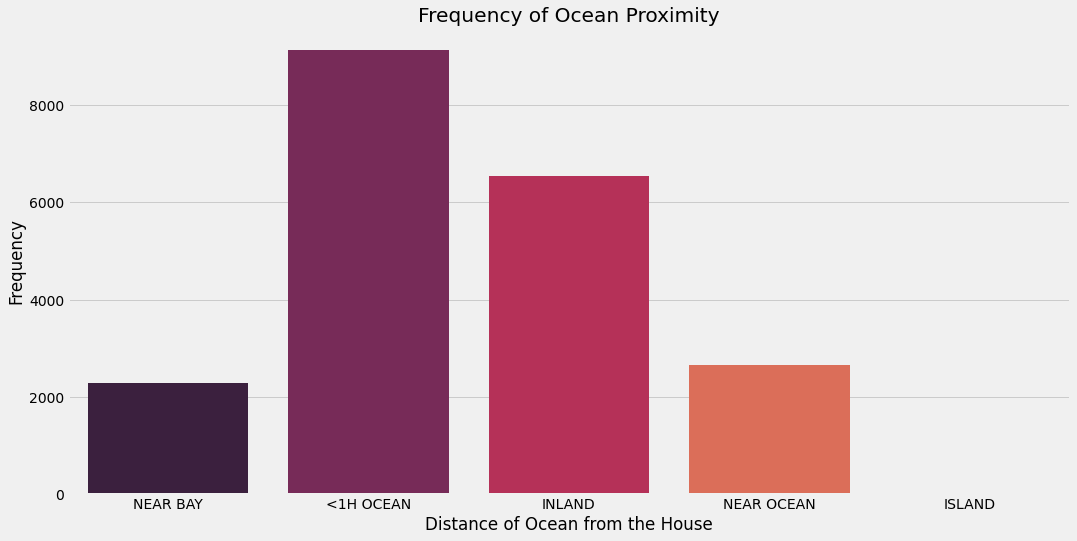

<Figure size 1800x1080 with 0 Axes>

In [8]:
sns.countplot(data=df, x="ocean_proximity",palette="rocket").set(title = "Frequency of Ocean Proximity",
                                                                    xlabel = "Distance of Ocean from the House",
                                                                    ylabel = "Frequency")
plt.figure(figsize=(25,15))
plt.show()

In [9]:
print("Mode for variable'ocean_proximity': %s"%(df['ocean_proximity'].value_counts().head(1)))

Mode for variable'ocean_proximity': <1H OCEAN    9136
Name: ocean_proximity, dtype: int64


## **Answer: <1H OCEAN**

# **Split the data**

* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
* Make sure that the target value (median_house_value) is not in your dataframe.


In [10]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2,random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

df_train.reset_index(drop=True,inplace=True)
df_test.reset_index(drop=True,inplace=True)
df_val.reset_index(drop=True,inplace=True)

y_train = df_train.median_house_value.values
y_test = df_test.median_house_value.values
y_val = df_val.median_house_value.values

del df_train['median_house_value']
del df_test['median_house_value']
del df_val['median_house_value']


In [11]:
len(df_train),len(df_test), len(df_val)

(12384, 4128, 4128)

# **Question 2**

* Create the correlation matrix for the numerical features of your train dataset.
  * In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.
* What are the two features that have the biggest correlation in this dataset?

Options:

* total_bedrooms and households
* total_bedrooms and total_rooms
* population and households
* population_per_household and total_rooms


,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
latitude,1.000000,-0.924664,0.011173,-0.036100,-0.065318,-0.108785,-0.071035,-0.079809,-0.144160,0.106389,-0.104112,0.002366
longitude,-0.924664,1.000000,-0.108197,0.044568,0.068082,0.099773,0.055310,-0.015176,-0.045967,-0.027540,0.084836,0.002476
housing_median_age,0.011173,-0.108197,1.000000,-0.361262,-0.317063,-0.296244,-0.302916,-0.119034,0.105623,-0.153277,0.125396,0.013191
total_rooms,-0.036100,0.044568,-0.361262,1.000000,0.920196,0.857126,0.918484,0.198050,0.134153,0.133798,-0.174583,-0.024581
total_bedrooms,-0.065318,0.068082,-0.317063,0.920196,1.000000,0.866266,0.966507,-0.007295,0.049148,0.002717,0.122205,-0.028019
population,-0.108785,0.099773,-0.296244,0.857126,0.866266,1.000000,0.907222,0.004834,-0.024650,-0.072213,0.031397,0.069863
households,-0.071035,0.055310,-0.302916,0.918484,0.966507,0.907222,1.000000,0.013033,0.065843,-0.080598,0.059818,-0.027309
median_income,-0.079809,-0.015176,-0.119034,0.198050,-0.007295,0.004834,0.013033,1.000000,0.688075,0.326895,-0.573836,0.018766
median_house_value,-0.144160,-0.045967,0.105623,0.134153,0.049148,-0.024650,0.065843,0.688075,1.000000,0.151948,-0.238759,-0.023737
rooms_per_household,0.106389,-0.027540,-0.153277,0.133798,0.002717,-0.072213,-0.080598,0.326895,0.151948,1.000000,-0.387465,-0.004852


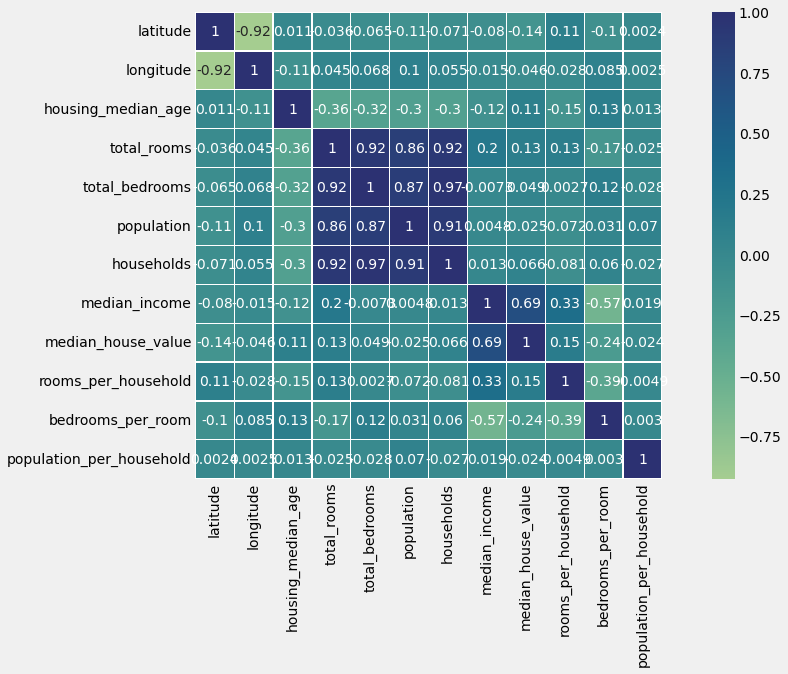

In [12]:
"""Creating a list of Numerical and Categorical columns"""

categorical = [col for col in df.columns if df[col].dtype == 'object']

numerical = [col for col in df.columns if col not in categorical]

"""correlation of Numerical columns"""
display(df[numerical].corr())

"""Heatmap of Numerical Variables"""

display(sns.heatmap(df[numerical].corr(),annot = True, lw=0.2,square=True,cmap='crest'))


In [13]:
corr_mat = df_full_train.corr()
upper_corr_mat = corr_mat.where(np.triu(np.ones(corr_mat.shape),k=1).astype(np.bool))

unique_corr_pairs = upper_corr_mat.unstack().dropna()

stored_mat = unique_corr_pairs.sort_values()
stored_mat

longitude          latitude              -0.924485
bedrooms_per_room  median_income         -0.616669
                   rooms_per_household   -0.435169
total_rooms        housing_median_age    -0.360922
total_bedrooms     housing_median_age    -0.320624
                                            ...   
population         total_bedrooms         0.878932
households         population             0.907452
                   total_rooms            0.920482
total_bedrooms     total_rooms            0.930489
households         total_bedrooms         0.980255
Length: 66, dtype: float64

### **Answer: total_bedrooms and households**

# **Make median_house_value binary**

* We need to turn the median_house_value variable from numeric into binary.
* Let's create a variable above_average which is 1 if the median_house_value is above its mean value and 0 otherwise.


In [14]:
y_train_num = y_train.copy()
y_val_num = y_val.copy()
y_test_num = y_test.copy()

y_train = (y_train > y_train.mean()).astype(int)
y_val = (y_val > y_val.mean()).astype(int)
y_test = (y_test > y_test.mean()).astype(int)

# **Question 3**

* Calculate the mutual information score with the (binarized) price for the categorical variable that we have. Use the training set only.
* What is the value of mutual information?
* Round it to 2 decimal digits using round(score, 2)

Options:

* 0.26
* 0
* 0.10
* 0.16

In [15]:
from sklearn.metrics import mutual_info_score

round(mutual_info_score(y_train,df_train.ocean_proximity),2)


0.1

## **Answer: 0.1**

# **Question 4**

* Now let's train a logistic regression
* Remember that we have one categorical variable ocean_proximity in the data. Include it using one-hot encoding.
* Fit the model on the training dataset.
  * To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
  * model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

Options:

* 0.60
* 0.72
* 0.84
* 0.95


In [16]:
numerical = [
    'latitude',
    'longitude',
    'housing_median_age',	
    'total_rooms',
    'total_bedrooms',	
    'population',	
    'households',
    'median_income',
    'rooms_per_household',
    'bedrooms_per_room',
    'population_per_household'
]

categorical = ['ocean_proximity']

In [17]:
from sklearn.feature_extraction import DictVectorizer

train_dict =df_train[categorical + numerical].to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dict)

val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.fit_transform(val_dicts)

test_dicts = df_test[categorical + numerical].to_dict(orient='records')
X_test = dv.fit_transform(test_dicts)

In [18]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)

In [19]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [20]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_val, model.predict(X_val))
round(acc,2)

0.84

### **Answer: 0.84**

# **Question 5**

* Let's find the least useful feature using the feature elimination technique.
* Train a model with all these features (using the same parameters as in Q4).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature.
* Which of following feature has the smallest difference?
  * total_rooms
  * total_bedrooms
  * population
  * households

> note: the difference doesn't have to be positive



In [22]:
results = {}

for feature in df_train.columns:
  model_x = LogisticRegression(solver = "liblinear", C=1.0, max_iter=1000, random_state=42)
  tmp_train = df_train.drop(feature, axis=1)
  tmp_val = df_val.drop(feature, axis=1)
  dv = DictVectorizer(sparse=False)
  tmp_train = dv.fit_transform(tmp_train.to_dict(orient='records'))
  tmp_val = dv.fit_transform(tmp_val.to_dict(orient='records'))
  
  model_x.fit(tmp_train,y_train)
  results[f'model_wo_{feature}'] = accuracy_score(y_val,model_x.predict(tmp_val))

In [23]:
sorted(results.items(), key=lambda kv:kv[1])

[('model_wo_median_income', 0.7868217054263565),
 ('model_wo_ocean_proximity', 0.8212209302325582),
 ('model_wo_population', 0.8275193798449613),
 ('model_wo_housing_median_age', 0.8311531007751938),
 ('model_wo_longitude', 0.8316375968992248),
 ('model_wo_households', 0.8340600775193798),
 ('model_wo_latitude', 0.8345445736434108),
 ('model_wo_rooms_per_household', 0.8350290697674418),
 ('model_wo_bedrooms_per_room', 0.8362403100775194),
 ('model_wo_population_per_household', 0.8362403100775194),
 ('model_wo_total_bedrooms', 0.8384205426356589),
 ('model_wo_total_rooms', 0.8391472868217055)]

In [24]:
for key, value in results.items():
  print(f"Different between original & {key} = {acc - value}")

Different between original & model_wo_latitude = 0.0016957364341085857
Different between original & model_wo_longitude = 0.004602713178294637
Different between original & model_wo_housing_median_age = 0.005087209302325646
Different between original & model_wo_total_rooms = -0.0029069767441860517
Different between original & model_wo_total_bedrooms = -0.0021802325581394832
Different between original & model_wo_population = 0.008720930232558155
Different between original & model_wo_households = 0.0021802325581395943
Different between original & model_wo_median_income = 0.04941860465116288
Different between original & model_wo_ocean_proximity = 0.015019379844961267
Different between original & model_wo_rooms_per_household = 0.001211240310077577
Different between original & model_wo_bedrooms_per_room = 0.0
Different between original & model_wo_population_per_household = 0.0


### **Answer: total_bedrooms**

# **Question 6**

* For this question, we'll see how to use a linear regression model from Scikit-Learn
* We'll need to use the original column 'median_house_value'. Apply the logarithmic transformation to this column.
* Fit the Ridge regression model (model = Ridge(alpha=a, solver="sag", random_state=42)) on the training data.
* This model has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10]
* Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.

If there are multiple options, select the smallest alpha.

Options:

* 0
* 0.01
* 0.1
* 1
* 10

In [25]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [26]:
results ={}
for a in [0, 0.01, 0.1, 1, 10]:
  model = Ridge(alpha = a,solver="sag", random_state=42)
  model.fit(X_train, y_train)

  results[f'alpha_{a}'] = round(mean_squared_error(y_val_num,model.predict(X_val),squared=False),3)

In [27]:
sorted(results.items(),key=lambda kv:kv[1])

[('alpha_0', 239046.039),
 ('alpha_0.01', 239046.039),
 ('alpha_0.1', 239046.039),
 ('alpha_1', 239046.039),
 ('alpha_10', 239046.039)]

### **Answer: 10**